### Importación de datos



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [8]:
# Añadir columna para identificar cada tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir todos los datasets
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4])

In [9]:
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [11]:
facturacion = df_total.groupby("tienda")["Precio"].sum().sort_values(ascending=False)
print(facturacion)

tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


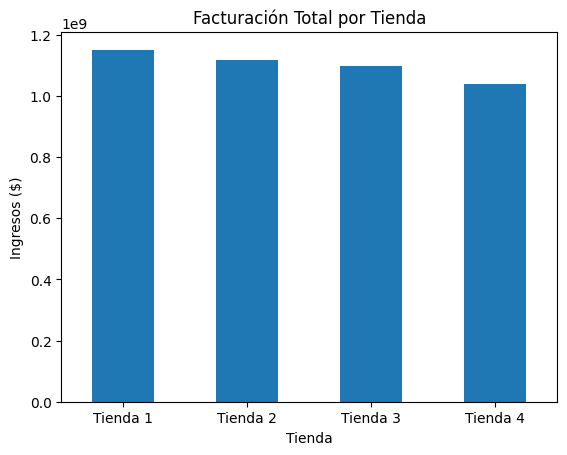

In [12]:
# Gráfico
facturacion.plot(kind="bar", title="Facturación Total por Tienda", ylabel="Ingresos ($)", xlabel="Tienda", legend=False)
plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

In [16]:
ventas_categoria = df_total.groupby(["tienda", "Categoría del Producto"])["Producto"].count().unstack().fillna(0)
print(ventas_categoria)

Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
tienda                                                                     
Tienda 1                                   182       3

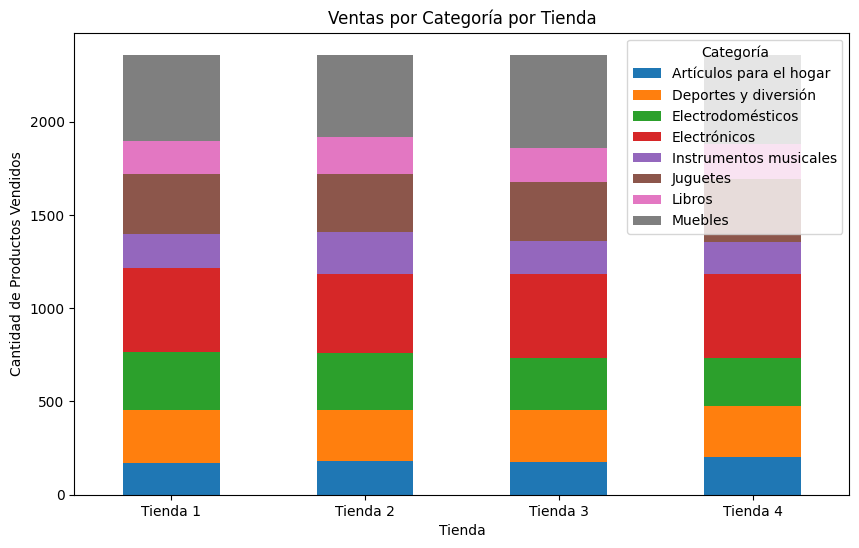

In [17]:
# Gráfico de barras apiladas
ventas_categoria.plot(kind="bar", stacked=True, figsize=(10,6), title="Ventas por Categoría por Tienda")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.show()

# 3. Calificación promedio de la tienda


In [19]:
calificaciones = df_total.groupby("tienda")["Calificación"].mean().round(2)
print(calificaciones)

tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


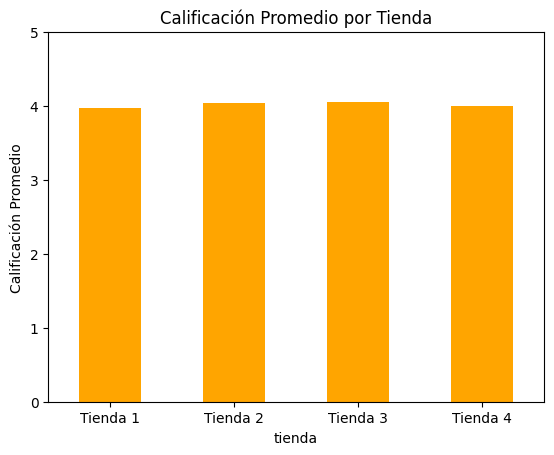

In [20]:
# Gráfico
calificaciones.plot(kind="bar", color="orange", title="Calificación Promedio por Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.show()

# 4. Productos más y menos vendidos

In [21]:
productos_vendidos = df_total.groupby(["tienda", "Producto"]).size()

# Función auxiliar para mostrar top y bottom productos
def mostrar_extremos(tienda):
    subset = productos_vendidos[tienda]
    print(f"\n{tienda} - Producto más vendido:")
    print(subset.idxmax(), " - ", subset.max())
    print(f"{tienda} - Producto menos vendido:")
    print(subset.idxmin(), " - ", subset.min())

for t in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    mostrar_extremos(t)


Tienda 1 - Producto más vendido:
Armario  -  60
Tienda 1 - Producto menos vendido:
Auriculares con micrófono  -  33

Tienda 2 - Producto más vendido:
Iniciando en programación  -  65
Tienda 2 - Producto menos vendido:
Juego de mesa  -  32

Tienda 3 - Producto más vendido:
Kit de bancas  -  57
Tienda 3 - Producto menos vendido:
Bloques de construcción  -  35

Tienda 4 - Producto más vendido:
Cama box  -  62
Tienda 4 - Producto menos vendido:
Guitarra eléctrica  -  33


# 5. Envío promedio por tienda

In [23]:
envio_promedio = df_total.groupby("tienda")["Costo de envío"].mean().round(2)
print(envio_promedio)

tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


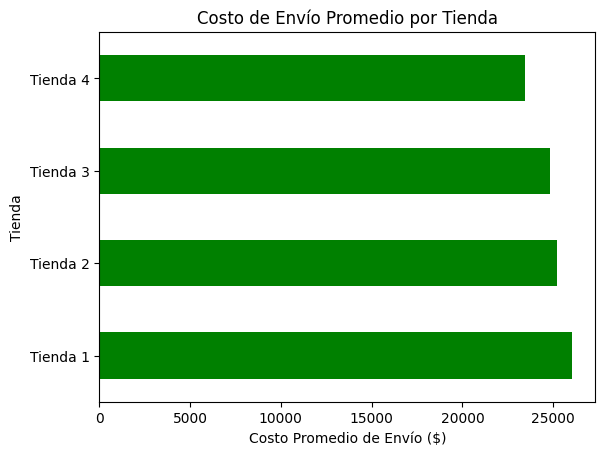

In [24]:
# Gráfico
envio_promedio.plot(kind="barh", title="Costo de Envío Promedio por Tienda", color="green")
plt.xlabel("Costo Promedio de Envío ($)")
plt.ylabel("Tienda")
plt.show()

# 6. Conclusiones y Reflexiones

Basándonos en el análisis anterior, nuestra recomendación es **vender en la Tienda 1**, por las siguientes razones:

- **Mayor facturación total**, lo que demuestra fuerte actividad comercial y alta rotación de productos.
- **Alto volumen de ventas** en categorías relevantes como Electrodomésticos y Electrónicos.
- Aunque no tiene la mejor calificación promedio, sigue siendo buena (3.98), y su mayor volumen de ventas sugiere mayor visibilidad o tráfico.
- Tiene un desempeño balanceado en categorías importantes y productos bien vendidos.

**Sin embargo**, si el enfoque está en:
- **Mejor reputación del cliente** ➤ optar por **Tienda 3** (mayor calificación).
- **Costos logísticos bajos** ➤ considerar **Tienda 4** (menor costo de envío).
- **Ventas especializadas o productos estrella** ➤ evaluar **Tienda 2** (producto más vendido del total).

---

## Reflexión Final

Este tipo de análisis permite tomar decisiones informadas basadas en múltiples dimensiones de los datos. La facturación, calificaciones, popularidad de productos y logística deben evaluarse en conjunto para optimizar el canal de ventas.
